[1] 2.809951

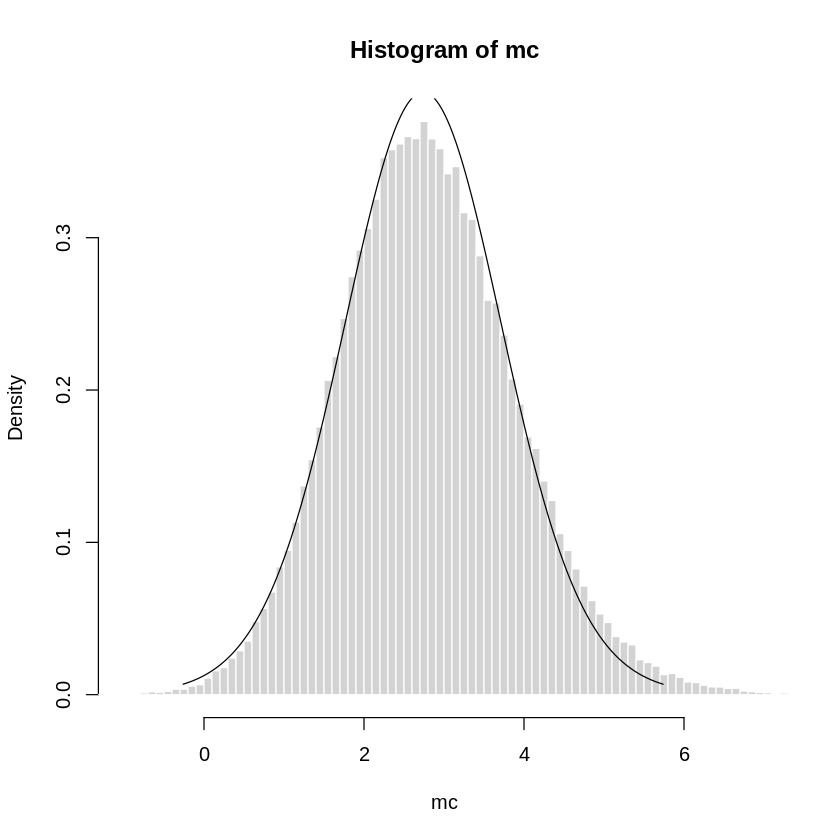

In [ ]:
# Trying to reproduce Taleb's p-hacking presentation in here: https://www.youtube.com/watch?v=8qrfSh07rT0&ab_channel=NNTaleb%27sProbabilityMoocs
# The assumption is that the difference between there is a difference from H0 of 0.5

set.seed(0)
n = 30
diff = 0.5
sim = replicate(1e5, rnorm(n, diff, 1))
mc = apply(sim,2,mean)/apply(sim,2,sd) * sqrt(n)
hist(mc, breaks=100, border=F, xlim=c(-1,7), freq=F)
# Since it is samples they follow a t-distribution - here it is plotted on top of the histogram. But a t-dist generalized, so
# https://en.wikipedia.org/wiki/Student%27s_t-distribution it is moved to the right:
lines(seq(-3, 3, 0.01) + diff*sqrt(n), dt(seq(-3, 3, 0.01), n - 1), type='l')
mean(mc) # Taleb gets 2.81392, so I guess we are doing the same.

[1] 0.02885753

[1] 0.004941461

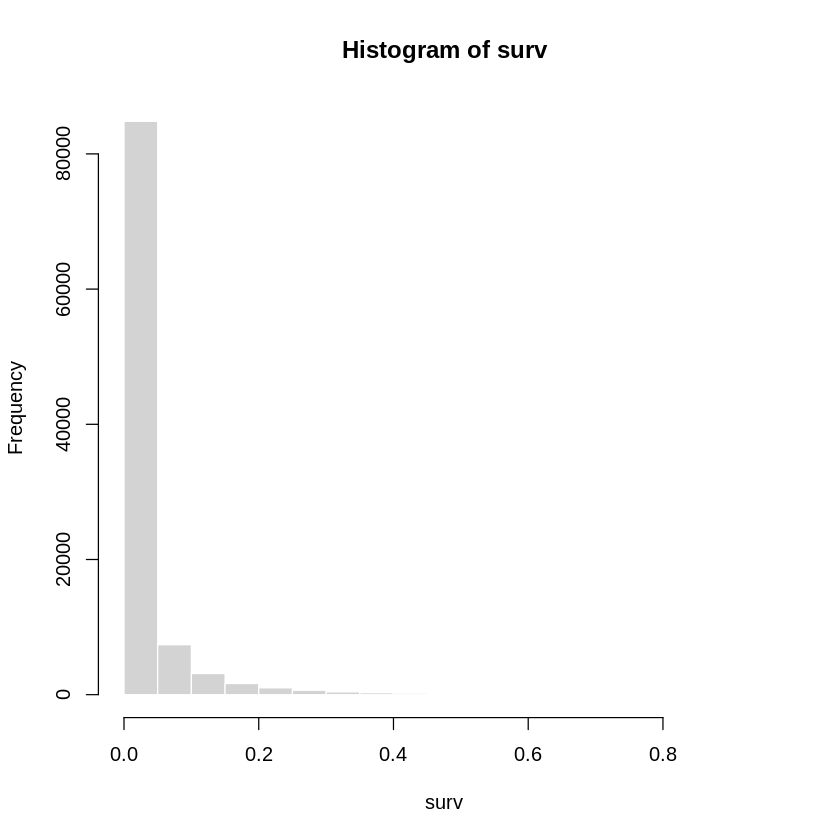

In [ ]:
# After that he runs StudentTDistribution[0, 1, 29] with the generalized t-Student with a scale parameter of 1 and mean of 0.
# And determines the probability (survival function) of getting values higher than the ones above by random chance
# See here: https://stats.stackexchange.com/a/525885/67822

surv = 1 - pt(mc, n - 1)
mean(surv) # He gets 0.0288965 so again on the same page. So 2.8 percent.
median(surv) # 0.0049 in Taleb's presentation.
hist(surv, border=F)